# Decision Trees Exercise
In this exercise you will show that ID3 is sub-optimal. Implement a simple version of Random Forest, and will then apply a Decision Tree classsifier and random forest on the MNIST hand written digits dataset that we already saw.


## Suboptimality of ID3
Consider the following training set, where $\mathcal{X} = \{0, 1\}^3$ and $\mathcal{Y} =\{0, 1\}$:

$$
\begin{aligned}
((1, 1, 1), 1)\\
((1, 0, 0), 1)\\
((1, 1, 0), 0)\\
((0, 0, 1), 0)
\end{aligned}
$$

Suppose we wish to use this training set in order to build a decision tree of depth 2 (i.e. for each
input we are allowed to ask two questions of the form "$x_i = 0$?" before deciding on the label).

1. Suppose we run the ID3 algorithm up to depth 2 (namely, we pick the root node and its
children according to the algorithm, but instead of keeping on with the recursion, we stop
and pick leaves according to the majority label in each subtree, once we reach depth 2). 
Assume that the subroutine used to measure the quality of each feature is based on the information gain, and that if two features get the same score, one of them is picked arbitrarily. 
Show that the training error of the resulting decision tree is at least 1/4.
2. Find a decision tree of depth 2, which attains zero training error.


#### Answer
$$H(S) = \frac{1}{2}*\log(\frac{1}{2})+\frac{1}{2}*\log(\frac{1}{2})=1$$

$$H(S | X[0]) = P(X[0]=0)*H(S | X[0]=0) + P(X[0]=1)*H(S | X[0]=1) =$$

$$\frac{1}{4}*(-1)*(1*\log(1)+0*\log(0))+\frac{3}{4}*(-1)*(\frac{2}{3}*\log(\frac{2}{3})+\frac{1}{3}*\log(\frac{1}{3}))=0.6887$$

$$H(S | X[1]) = P(X[1]=0)*H(S | X[1]=0) + P(X[1]=1)*H(S | X[1]=1) =$$

$$\frac{1}{2}*(-1)*(\frac{1}{2}*\log(\frac{1}{2})+\frac{1}{2}*\log(\frac{1}{2}))+\frac{1}{2}*(-1)*(\frac{1}{2}*\log(\frac{1}{2})+\frac{1}{2}*\log(\frac{1}{2}))=1$$

$$H(S | X[2]) = P(X[2]=0)*H(S | X[2]=0) + P(X[2]=1)*H(S | X[2]=1) =$$

$$\frac{1}{2}*(-1)*(\frac{1}{2}*\log(\frac{1}{2})+\frac{1}{2}*\log(\frac{1}{2}))+\frac{1}{2}*(-1)*(\frac{1}{2}*\log(\frac{1}{2})+\frac{1}{2}*\log(\frac{1}{2}))=1$$

$$\Longrightarrow$$

$$IG(S | X[0]) = 1 - 0.6887 = 0.3113$$

$$IG(S | X[1]) = 1 - 1 = 0$$

$$IG(S | X[2]) = 1 - 1 = 0$$

<br>
<center>First feature chosen - X[0]</center>


$$H(S, X[0]=1) = \frac{2}{3}*\log(\frac{2}{3})+\frac{1}{3}*\log(\frac{1}{3})=0.6365$$

$$H(S, X[0]=1 | X[1]) = P(X[1]=0)*H(S, X[0]=1 | X[1]=0) + P(X[1]=1)*H(S, X[0]=1 | X[1]=1) =$$

$$\frac{1}{3}*(-1)*(1*\log(1)+0*\log(0))+\frac{2}{3}*(-1)*(\frac{1}{2}*\log(\frac{1}{2})+\frac{1}{2}*\log(\frac{1}{2}))=\frac{2}{3}$$

$$H(S, X[0]=1 | X[2]) = P(X[2]=0)*H(S, X[0]=1 | X[2]=0) + P(X[2]=1)*H(S, X[0]=1 | X[2]=1) =$$

$$\frac{1}{3}*(-1)*(1*\log(1)+0*\log(0))+\frac{2}{3}*(-1)*(\frac{1}{2}*\log(\frac{1}{2})+\frac{1}{2}*\log(\frac{1}{2}))=\frac{2}{3}$$
<br>
<center>Both features diminish the entropy in equal measures</center>

In [1]:
import numpy as np
import pandas as pd

In [2]:
def get_label(X):
    if X[2] == 1:
        return X[1]
    else: return 1-X[1]

In [3]:
X_y = np.array([[1,1,1,1],
              [1,0,0,1],
              [1,1,0,0],
              [0,0,1,0]])

In [4]:
def Test(X):
    for vec in X:
        if get_label(vec) != vec[3]:
            return False
    print('PASSED')

Test(X_y)

PASSED


## Implementing Random Forest From Scratch
In this exercise you will need to implement a simple version of Random Forest Regressor from scratch. Your decision tree will handle **continuous input and output** (this should actually work also for binary input attributes). 

* Compelete the skeleton class below (hint: you should also create a `DecisionTree` class that the `TreeEnsemble` will use)
  - `X` is a matrix of data values (rows are samples, columns are attributes)
  - `y` is a vector of corresponding target values
  - `n_trees` is the number of trees to create
  - `sample_sz` is the size of the sample set to use of each of the trees in the forest (chose the samples randomly, with or without repetition)
  - `min_leaf` is the minimal number of samples in each leaf node of each tree in the forest
  
* For splitting criterion, use either **"Train Squared Error Minimization (Reduction in Variance)"** or **"Train Absolute Error Minimization"** (choose one). Whatever you choose, make sure you implement the splitting point decision efficiently (in $O(nlgn)$ time).

* The `predict` function will use mean of the target values in the leaf node matching each row of the given `X`. The result is a vector of predictions matching the number of rows in `X`.

* The `oob_mse` function will compute the mean squared error over all **out of bag (oob)** samples. That is, for each sample calculate the squared error using  predictions from the trees that do not contain x in their respective bootstrap sample, then average this score for all samples. See:  [OOB Errors for Random Forests](https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html).

* To check your random forest implementation, use the boston dataset (`from sklearn.datasets import load_boston`)

  - Use the following to estimate what are the best hyper parameters to use for your model
```
for n in [1,5,10,20,50,100]:
  for sz in [50,100,300,500]:
    for min_leaf in [1,5]:
      forest = TreeEnsemble(X, y, n, sz, min_leaf)
      mse = forest.oob_mse()
      print("n_trees:{0}, sz:{1}, min_leaf:{2} --- oob mse: {3}".format(n, sz, min_leaf, mse))
```
  
  - Using your chosen hyperparameters as a final model, plot the predictions vs. true values of all the samples in the training set . Use something like:
  ```
  y_hat = forest.predict(X)  # forest is the chosen model
  plt.scatter(y_hat, y)
  ```
  
* Following a discusion during office hours regarding Random Forest we invite the curious and enthusiastic data scientists among you to add to your tree implementation the option of random sampling the number of features used in building the tree. and to plot the mean squared error over all **out of bag (oob)** samples.
    - `n_features` is the size of features to sample. This can be a natrual number > 0, or a ratio of the features as a number in range (0,1] 


In [188]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import sys
import threading
import time
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [189]:
class node():
    
    def __init__(self, parent):
        self.feature = None
        self.is_leaf = False
        self.left = None
        self.right = None
        self.parent = parent
        self.critical_value = None
        self.pred = None
        self.val = None
        
    def get_child(self, x):
        if x[self.feature] > self.critical_value:
            return self.right
        return self.left
     
    def set_left(self, left):
        self.left = left
        
    def set_right(self, right):
        self.right = right
        
    def set_pred(self, pred):
        self.pred = pred
        
    def set_is_leaf(self, is_leaf):
        self.is_leaf = is_leaf
        
    def set_feature_and_value(self, feature, critical_value):
        self.feature = feature
        self.critical_value = critical_value

In [190]:
def print_tree(root, val="val", left="left", right="right"):
    def display(root, val=val, left=left, right=right):
        """Returns list of strings, width, height, and horizontal coordinate of the root."""
        # No child.
        if getattr(root, right) is None and getattr(root, left) is None:
            line = '%s' % getattr(root, val)
            width = len(line)
            height = 1
            middle = width // 2
            return [line], width, height, middle
        # Only left child.
        if getattr(root, right) is None:
            lines, n, p, x = display(getattr(root, left))
            s = '%s' % getattr(root, val)
            u = len(s)
            first_line = (x + 1) * ' ' + (n - x - 1) * '_' + s
            second_line = x * ' ' + '/' + (n - x - 1 + u) * ' '
            shifted_lines = [line + u * ' ' for line in lines]
            return [first_line, second_line] + shifted_lines, n + u, p + 2, n + u // 2
        # Only right child.
        if getattr(root, left) is None:
            lines, n, p, x = display(getattr(root, right))
            s = '%s' % getattr(root, val)
            u = len(s)
            first_line = s + x * '_' + (n - x) * ' '
            second_line = (u + x) * ' ' + '\\' + (n - x - 1) * ' '
            shifted_lines = [u * ' ' + line for line in lines]
            return [first_line, second_line] + shifted_lines, n + u, p + 2, u // 2
        # Two children.
        left, n, p, x = display(getattr(root, left))
        right, m, q, y = display(getattr(root, right))
        s = '%s' % getattr(root, val)
        u = len(s)
        first_line = (x + 1) * ' ' + (n - x - 1) * '_' + s + y * '_' + (m - y) * ' '
        second_line = x * ' ' + '/' + (n - x - 1 + u + y) * ' ' + '\\' + (m - y - 1) * ' '
        if p < q:
            left += [n * ' '] * (q - p)
        elif q < p:
            right += [m * ' '] * (p - q)
        zipped_lines = zip(left, right)
        lines = [first_line, second_line] + [a + u * ' ' + b for a, b in zipped_lines]
        return lines, n + m + u, max(p, q) + 2, n + u // 2
    lines, *_ = display(root, val, left, right)
    for line in lines:
        print(line)
    print()

In [350]:
class Tree():
    
    def __init__(self, min_leaf_size, max_level=0):
        self.min_leaf_size = min_leaf_size
        self.max_level = max_level
        self.root = None
        
    def fit_rec(self, X, y, feature_lst, parent, level):
        new_node = node(parent)
        if ((X.shape[0] < 2*self.min_leaf_size) | 
            (len(feature_lst) == 0) | 
            (level==self.max_level)):
            new_node.set_pred(y.mean())
            new_node.set_is_leaf(True)
            return new_node
        
        feature, critical_value, variance = self.get_feature_critical_value(X, y, feature_lst)
        if variance == np.inf:
            new_node.set_pred(y.mean())
            new_node.set_is_leaf(True)
            return new_node
        self.feature_ranks[feature] += len(feature_lst)
        new_node.set_feature_and_value(feature, critical_value)
        new_node.val = len(X)
        feature_lst.remove(feature)
        X_right, y_right, X_left, y_left = self.split_data(X, y, feature, critical_value)
        left_son = self.fit_rec(X_left, y_left, feature_lst.copy(), new_node, level+1)
        new_node.set_left(left_son)
        right_son = self.fit_rec(X_right, y_right, feature_lst.copy(), new_node, level+1)
        new_node.set_right(right_son)
        return new_node
    
    def fit(self, X, y):
        self.feature_ranks = {k:0 for k in range(X.shape[1])}
        feature_lst = set(range(X.shape[1]))
        root = self.fit_rec(X, y, feature_lst, None, 1)
        self.root = root
        
    def get_critical_value(self,X,y,feature):
        x = X[:,feature]
        med=np.median(x)
        if ((x<=med).sum()<self.min_leaf_size) | ((x>med).sum()<self.min_leaf_size):
            return (med,np.inf)
        variance = np.var(y[x<=med])*((x<=med).sum()) + np.var(y[x>med])*((x>med).sum())
        return (med, variance)
        """
        var_score = np.zeros(len(x))
        for i, val in enumerate(x):
            if ((x<=val).sum()<self.min_leaf_size) | ((x>val).sum()<self.min_leaf_size):
                var_score[i] = np.inf
            else:
                var_score[i] = np.var(y[x<=val])*((x<=val).sum()) + np.var(y[x>val])*((x>val).sum())
        min_idx = np.argmin(var_score)
        return (x[min_idx], var_score[min_idx])
        """
    
    def get_feature_critical_value(self, X, y, feature_set):
        features = []
        criticals = []
        variances = []
        for feature in feature_set:
            critical, variance =  self.get_critical_value(X, y, feature)
            features.append(feature)
            criticals.append(critical)
            variances.append(variance)
        min_idx = np.argmin(variances)
        return [features[min_idx], criticals[min_idx], variances[min_idx]]
    
    def split_data(self, X, y, feature, critical_value):
        right = np.array(X[:,feature] > critical_value)
        X_right = X[right, :]
        X_left = X[~right, :]
        y_right = y[right]
        y_left = y[~right]
        return X_right, y_right, X_left, y_left
    
    def predict(self, X):
        def predict_row(x):
            current = self.root
            while not current.is_leaf:
                current = current.get_child(x)
            return current.pred
        return np.apply_along_axis(predict_row, 1, X)
    
    def mse_score(self, X, y):
        y_hat = self.predict(X)
        return mean_squared_error(y_hat, y)

(506, 13)


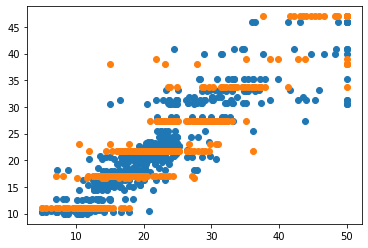

In [341]:
def Test_tree():
    a = load_boston()
    X = a.data
    y = a.target
    clf = Tree(8)
    clf.fit(X,y)
    y_hat = clf.predict(X)
    clf_sklearn = DecisionTreeRegressor(min_samples_leaf=7, max_leaf_nodes=10)
    clf_sklearn.fit(X, y)
    y_hat2=clf_sklearn.predict(X)
    plt.scatter(y,y_hat)
    plt.scatter(y,y_hat2)
    plt.show();

Test_tree()

In [355]:
class TreeEnsemble():
    def __init__(self, X, y, n_trees, sample_sz, min_leaf):
        self.X = X
        self.y = y
        self.n_trees = n_trees
        self.sample_sz = sample_sz
        self.min_leaf = min_leaf
        
    def fit(self):
        tree_idx_lst = []
        tree_lst = []
        oob_idx_lst = set()
        for i in range(self.n_trees):
            sample_idx = np.random.choice(self.X.shape[0], self.sample_sz, replace=False)
            train_idx = np.random.choice(sample_idx, 2*(self.sample_sz//3), replace=False)
            oob_idx = np.setdiff1d(sample_idx, train_idx, assume_unique=True)
    
            X_train, y_train = self.X[train_idx,:], self.y[train_idx]
            
            tree_idx_lst.append(train_idx)
            tree_lst.append(Tree(self.min_leaf))
            oob_idx_lst.update(oob_idx)
            tree_lst[i].fit(X_train, y_train)
        
        self.tree_lst = tree_lst
        self.tree_idx_lst = tree_idx_lst
        self.oob_idx_lst = oob_idx_lst
        
    def predict(self, X):
        pred_lst = []
        for tree in self.tree_lst:
            pred_lst.append(tree.predict(X))
        pred = np.stack(pred_lst, axis=1).mean(axis=1)
        return pred
  
    def oob_mse(self):
        mse = []
        curr_mse = []
        true_y = self.y[np.array(list(self.oob_idx_lst))]
        y_hat = []
        for idx in self.oob_idx_lst:
            pred_lst = []
            for i in range(len(self.tree_lst)):
                if idx not in self.tree_idx_lst[i]:
                    pred_lst.append(self.tree_lst[i].predict(np.expand_dims(self.X[idx], axis=0)))
            y_hat.append(np.mean(np.array(pred_lst)))
        return mean_squared_error(true_y, y_hat)
    
    def feature_importance(self):
        m = self.X.shape[1]
        importance = np.zeros(m)
        for i in range(m):
            for tree in self.tree_lst:
                importance[i] += tree.feature_ranks[i]
        return pd.Series(importance)

In [356]:
a = load_boston()
X = a.data
y = a.target

oob mse error is: 25.158995208599716


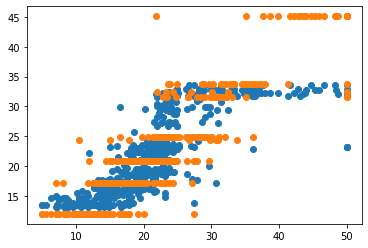

In [357]:
def Test_ensemble_to_sklearn_tree():
    clf = TreeEnsemble(X, y, 15, 70, 7)
    clf.fit()
    print("oob mse error is:", clf.oob_mse())
    y_hat = clf.predict(X)
    clf_sklearn = DecisionTreeRegressor(min_samples_leaf=8, max_leaf_nodes=10)
    clf_sklearn.fit(X, y)
    y_hat2=clf_sklearn.predict(X)
    plt.scatter(y,y_hat)
    plt.scatter(y,y_hat2)
    plt.show();

Test_ensemble_to_sklearn_tree()

oob mse error is: 27.19387037826452


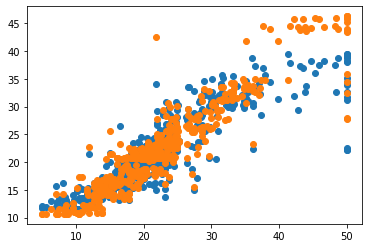

In [358]:
def Test_ensemble_to_sklearn_ensemble():
    clf = TreeEnsemble(X, y, 15, 70, 2)
    clf.fit()
    print("oob mse error is:", clf.oob_mse())
    y_hat = clf.predict(X)
    clf_sklearn = RandomForestRegressor(min_samples_leaf=8, max_leaf_nodes=10)
    clf_sklearn.fit(X, y)
    y_hat2=clf_sklearn.predict(X)
    plt.scatter(y,y_hat)
    plt.scatter(y,y_hat2)
    plt.show();

Test_ensemble_to_sklearn_ensemble()

Optimal min_leaf size is: 1


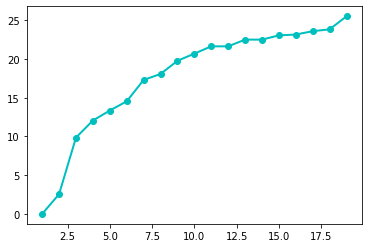

In [359]:
def Tree_test():
    test_range = 20
    res = np.zeros(test_range-1)
    best_min_leaf_size = 0
    curr_error = np.inf
    for i in range(1, test_range-1):
        clf = Tree(i)
        clf.fit(X, y)
        res[i] = clf.mse_score(X, y)
        if res[i] < curr_error:
            curr_error = res[i]
            best_min_leaf_size = i
    print("Optimal min_leaf size is:", best_min_leaf_size)
    plt.plot(np.arange(1, test_range), res, 'co-', linewidth=2, markersize=6);

Tree_test()

In [360]:
def Ensemble_test():
    min_error = np.inf
    for n in [1,5,10,20,50,100]:
        for sz in [50,100,300,500]:
            for min_leaf in [1,5]:
                forest = TreeEnsemble(X, y, n, sz, min_leaf)
                forest.fit()
                mse = forest.oob_mse()
                print("n_trees:{0}, sz:{1}, min_leaf:{2} --- oob mse: {3}".format(n, sz, min_leaf, mse))
                curr_error = mse
                if min_error > curr_error:
                    min_error = curr_error
                    best_sample_sz = sz
                    best_n_tree = n
                    best_min_leaf = min_leaf
    
    print()
    print("Optimal sample_sz size is:", best_sample_sz)
    print("Optimal n_tree size is:", best_n_tree)
    print("Optimal min_leaf size is:", best_min_leaf)

Ensemble_test()

n_trees:1, sz:50, min_leaf:1 --- oob mse: 29.23277777777778
n_trees:1, sz:50, min_leaf:5 --- oob mse: 26.42380208333333
n_trees:1, sz:100, min_leaf:1 --- oob mse: 136.08205882352942
n_trees:1, sz:100, min_leaf:5 --- oob mse: 36.41925870802024
n_trees:1, sz:300, min_leaf:1 --- oob mse: 44.05193055555556
n_trees:1, sz:300, min_leaf:5 --- oob mse: 48.99944543820861
n_trees:1, sz:500, min_leaf:1 --- oob mse: 46.26530423280423
n_trees:1, sz:500, min_leaf:5 --- oob mse: 27.139739718495424
n_trees:5, sz:50, min_leaf:1 --- oob mse: 25.00652125
n_trees:5, sz:50, min_leaf:5 --- oob mse: 20.046731562500003
n_trees:5, sz:100, min_leaf:1 --- oob mse: 20.78521864814815
n_trees:5, sz:100, min_leaf:5 --- oob mse: 24.453517928080856
n_trees:5, sz:300, min_leaf:1 --- oob mse: 27.520455715435652
n_trees:5, sz:300, min_leaf:5 --- oob mse: 23.551351019975687
n_trees:5, sz:500, min_leaf:1 --- oob mse: 29.51664079194883
n_trees:5, sz:500, min_leaf:5 --- oob mse: 27.0590048341183
n_trees:10, sz:50, min_leaf:1

## Using Decision Tree and Random Forest for Digits Classification
Remeber the MNIST dataset used - you will now test the power of decision trees on this problem.
This time you are given a free hand in choosing the test and train set sizes, model parameters (such as gain function and constraints over the trees) and features (whether to use binary pixel values or the original continous gray value).
- Choose which model parameters you wish to optimize, explain how would you do that, and find a model which you believe would have the minimal generalization error --- do this for both a single decision tree model, and a random forest.
  - You can use `sklearn.tree.DecisionTreeClassifier` and `sklearn.ensemble.RandomForestClassifier`
- Once you are satisfied with the model parameters, plot for each of the models (a single decision tree and random forest) the importance of each of the pixels to the final decision.
- Last, estimate the class assignment probabilities for all the correctly classified and misclassified examples in your test data.
- Discuss your results.

In [205]:
from keras.datasets import mnist

In [206]:
def animate():
    while done["State"] == 'loading':
        sys.stdout.write('\rloading |')
        time.sleep(0.1)
        sys.stdout.write('\rloading /')
        time.sleep(0.1)
        sys.stdout.write('\rloading -')
        time.sleep(0.1)
        sys.stdout.write('\rloading \\')
        time.sleep(0.1)
    sys.stdout.write('\rDone!     ')

In [207]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X_flatten = train_X.reshape(train_X.shape[0], -1)
test_X_flatten = test_X.reshape(test_X.shape[0], -1)

In [362]:
%time
clf = Tree(2)
print("fitting")
clf.fit(train_X_flatten, train_y)
print("fit - DONE, predicting...")
res = clf.mse_score(test_X_flatten, test_y)
print("TEST -> min_leaf = {}, mse_errror = {}".format(i, res))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs
fitting


KeyboardInterrupt: 

In [208]:
def Tree_mnist_test():
    test_range = 11
    res = np.zeros(test_range-1)
    best_min_leaf_size = 0
    curr_error = np.inf
    for i in range(1, test_range):
        clf = Tree(i)
        clf.fit(train_X_flatten, train_y)
        res[i] = clf.mse_score(test_X_flatten, test_y)
        if res[i] < curr_error:
            curr_error = res[i]
            best_min_leaf_size = i
    print("Optimal min_leaf size is:", best_min_leaf_size)
    plt.plot(np.arange(1, test_range), res, 'co-', linewidth=2, markersize=6);

Tree_mnist_test()

KeyboardInterrupt: 

In [ ]:
def Ensemble_mnist_test():
    min_error = np.inf
    for n in [1,5,10,20,50,100]:
        for sz in [50,100,300,500]:
            for min_leaf in [1,5]:
                forest = TreeEnsemble(train_X_flatten, train_y, n, sz, min_leaf)
                forest.fit()
                mse = forest.oob_mse()
                print("n_trees:{0}, sz:{1}, min_leaf:{2} --- oob mse: {3}".format(n, sz, min_leaf, mse))
                curr_error = mse
                if min_error > curr_error:
                    min_error = curr_error
                    best_sample_sz = sz
                    best_n_tree = n
                    best_min_leaf = min_leaf
    
    print()
    print("Optimal sample_sz size is:", best_sample_sz)
    print("Optimal n_tree size is:", best_n_tree)
    print("Optimal min_leaf size is:", best_min_leaf)

Ensemble_mnist_test()

In [ ]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X_flatten = train_X.reshape(train_X.shape[0], -1)
test_X_flatten = test_X.reshape(test_X.shape[0], -1)

In [361]:
best_sample_sz = 500
best_n_tree = 100
best_min_leaf = 1

In [ ]:
forest = TreeEnsemble(train_X_flatten, train_y, best_n_tree, best_sample_sz, best_min_leaf)
forest.fit()

In [ ]:
importance = forest.feature_importance()

In [ ]:
# code and answer go here

## References
- https://www.analyticsvidhya.com/blog/2014/06/introduction-random-forest-simplified/